### Multi Linear Regression
Two Independent or inout features, one Dependent or output feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.shape

(24, 6)

In [8]:
## Drop unneccesary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis = 1, inplace=True)
# inplace = True means it will make changes in the actual df
# axis = 1 for columns

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
# Check Null Values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [12]:
## Lets do some Visualization
import seaborn as sns

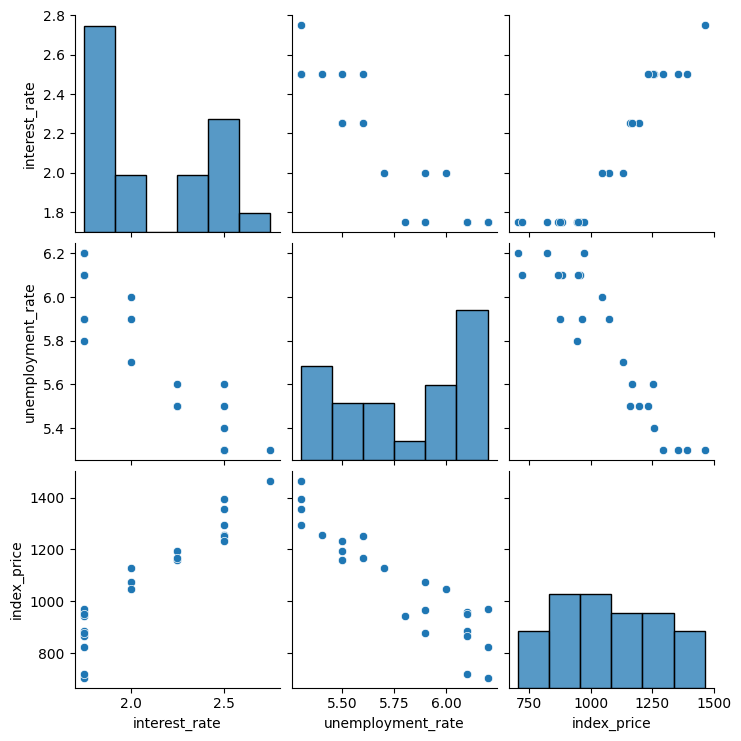

In [13]:
sns.pairplot(df)

In [14]:
## Features Correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

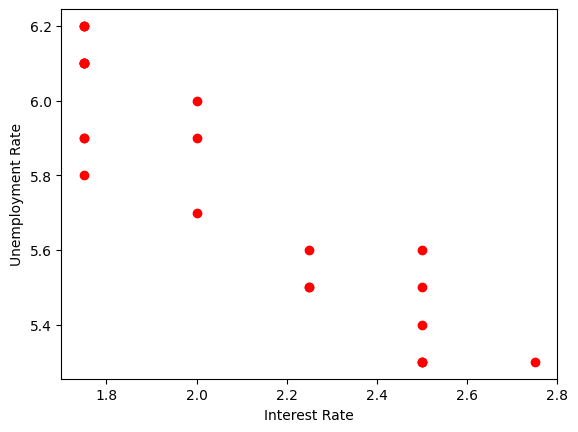

In [16]:
## Visualize the Datapoints more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [ ]:
## Get Independent and Dependent Features
X = df[[df['interest_rate'], df['unemployment_rate']]]

In [19]:
# We can use pandas iloc also
X = df.iloc[:,:-1] # : - indicates take all rows, :-1 Take all columns except last column

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [21]:
y = df.iloc[:,-1] # Take all rows, take only last column

In [22]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

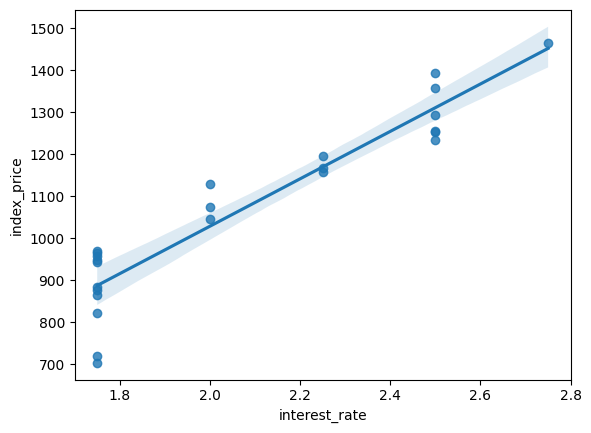

In [28]:
sns.regplot(x = df['interest_rate'], y = df['index_price']) # It plots data and a linear regression model fit

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

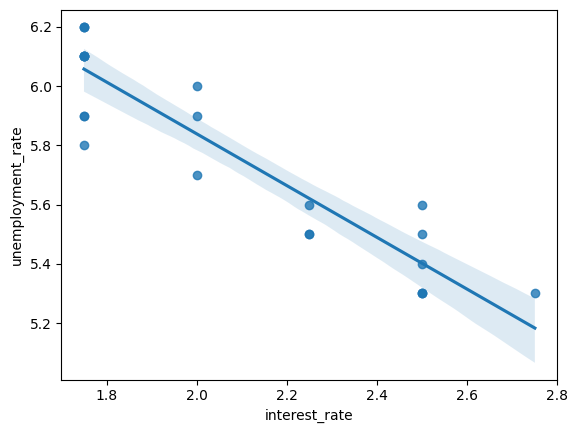

In [29]:
sns.regplot(x = df['interest_rate'], y = df['unemployment_rate']) # It plots data and a linear regression model fit

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

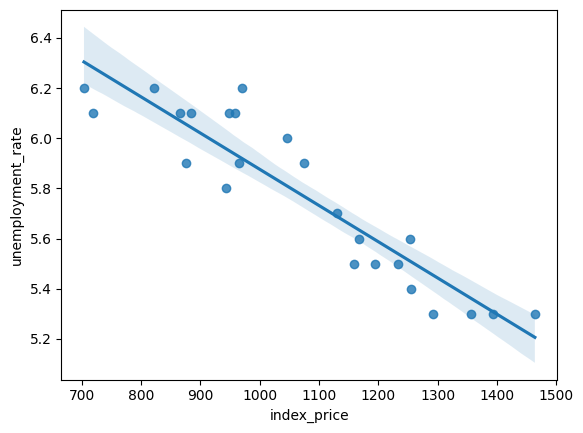

In [30]:
sns.regplot(x = df['index_price'], y = df['unemployment_rate']) # It plots data and a linear regression model fit

In [31]:
## We can't create it for more than 2 features

In [32]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
# No need to do for Target value here

In [35]:
## Implementing model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
## Cross val score is a cross validation method
# Give your model, give your x_train, y_train
# and this inturn gives cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=3)
# cv = 3 --> means 3% of train data will be used as test data for cross validation
# this will repeat for k folds and we will take average test score

In [40]:
validation_score # Here we will get 3 average MSE scores

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [41]:
np.mean(validation_score)

-5914.8281801623925

In [42]:
# Do Predictions
y_pred = regression.predict(X_test)

In [43]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [44]:
# Performance Metrics for Regression - MSE, MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
# Display R-adjusted square
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


### Assumptions

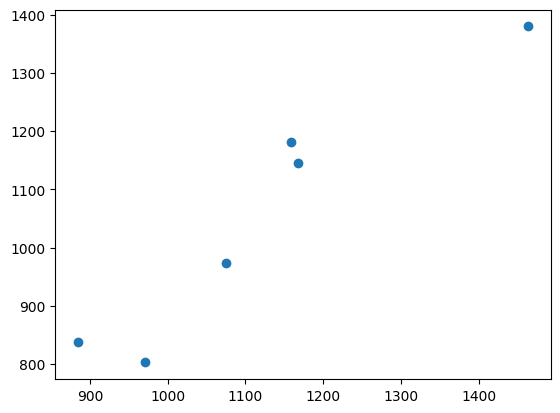

In [50]:
plt.scatter(y_test, y_pred) # If there is linear relationship between y_test and y_pred means your model had pereformed well

In [51]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


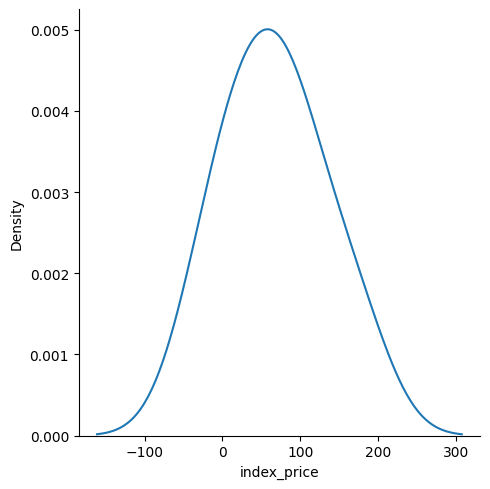

In [53]:
## Plot Residuals
sns.displot(residuals, kind = 'kde') # this gives normal distribution curve
# If we are getting below curve, means that model we created is good

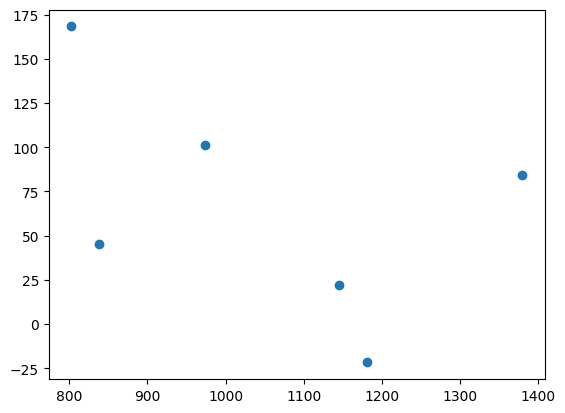

In [54]:
## create a scatter plot with respect to residuals and prediction
plt.scatter(y_pred, residuals)

In [56]:
## OLS Linear Regression
import statsmodels.api as sm

In [57]:
model = sm.OLS(y_train, X_train).fit()

In [58]:
model.summary()

/Users/rajesh/anaconda3/envs/ml/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                       0.754
Time:                        07:12:52   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(regression.coef_)

[  88.27275507 -116.25716066]
